# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | viligili
City not found. Skipping...
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | imbituba
Processing Record 4 of Set 1 | verkhniye sergi
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | olonkinbyen
Processing Record 9 of Set 1 | richards bay
Processing Record 10 of Set 1 | lazaro cardenas
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | sorong
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | whitehorse
Processing Record 16 of Set 1 | ormara
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | katsuura
Processing Record 19 of Set 1 | thunder bay
Processing Record 20 of Set 1 | swift current
Processing Record 21 of Set 1 | to

Processing Record 36 of Set 4 | bintulu
Processing Record 37 of Set 4 | nalut
Processing Record 38 of Set 4 | bandarbeyla
Processing Record 39 of Set 4 | pitkyaranta
Processing Record 40 of Set 4 | east london
Processing Record 41 of Set 4 | yulinshi
Processing Record 42 of Set 4 | sisimiut
Processing Record 43 of Set 4 | saint-joseph
Processing Record 44 of Set 4 | tadine
Processing Record 45 of Set 4 | ribeira grande
Processing Record 46 of Set 4 | flying fish cove
Processing Record 47 of Set 4 | revda
Processing Record 48 of Set 4 | harper
Processing Record 49 of Set 4 | wailua homesteads
Processing Record 0 of Set 5 | duncan town
City not found. Skipping...
Processing Record 1 of Set 5 | lubang
Processing Record 2 of Set 5 | chibougamau
Processing Record 3 of Set 5 | carbonia
Processing Record 4 of Set 5 | zaragoza
Processing Record 5 of Set 5 | la passe
Processing Record 6 of Set 5 | orkney
Processing Record 7 of Set 5 | sao joao da barra
Processing Record 8 of Set 5 | polyarnyy
P

Processing Record 25 of Set 8 | kapa'a
Processing Record 26 of Set 8 | cidreira
Processing Record 27 of Set 8 | wenling
Processing Record 28 of Set 8 | kahta
Processing Record 29 of Set 8 | kununurra
Processing Record 30 of Set 8 | mount gambier
Processing Record 31 of Set 8 | haiku-pauwela
Processing Record 32 of Set 8 | lamu
Processing Record 33 of Set 8 | ghadamis
Processing Record 34 of Set 8 | yuzhno-kurilsk
Processing Record 35 of Set 8 | fonadhoo
City not found. Skipping...
Processing Record 36 of Set 8 | el porvenir
Processing Record 37 of Set 8 | sal rei
Processing Record 38 of Set 8 | tucuma
Processing Record 39 of Set 8 | esmeraldas
Processing Record 40 of Set 8 | villa gesell
Processing Record 41 of Set 8 | yarovoye
Processing Record 42 of Set 8 | las khorey
Processing Record 43 of Set 8 | puerto baquerizo moreno
Processing Record 44 of Set 8 | rawson
Processing Record 45 of Set 8 | kalmunai
Processing Record 46 of Set 8 | can giuoc
Processing Record 47 of Set 8 | severnoye

Processing Record 10 of Set 12 | southeast arcadia
Processing Record 11 of Set 12 | lewiston orchards
Processing Record 12 of Set 12 | murun-kuren
Processing Record 13 of Set 12 | tura
Processing Record 14 of Set 12 | santa elena de uairen
Processing Record 15 of Set 12 | auki
Processing Record 16 of Set 12 | kiunga
Processing Record 17 of Set 12 | undurkhaan
Processing Record 18 of Set 12 | vorotynets
Processing Record 19 of Set 12 | ylitornio
Processing Record 20 of Set 12 | leh
Processing Record 21 of Set 12 | puerto aysen
Processing Record 22 of Set 12 | bokhtar
City not found. Skipping...
Processing Record 23 of Set 12 | kem'
Processing Record 24 of Set 12 | pagar alam
Processing Record 25 of Set 12 | priob'ye
Processing Record 26 of Set 12 | pupri
Processing Record 27 of Set 12 | saldanha
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          540
Lat           540
Lng           540
Max Temp      540
Humidity      540
Cloudiness    540
Wind Speed    540
Country       540
Date          540
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,imbituba,-28.2400,-48.6703,23.28,94,100,4.68,BR,1697574269
1,verkhniye sergi,56.6469,59.5556,8.69,66,98,6.03,RU,1697574269
2,waitangi,-43.9535,-176.5597,11.57,76,0,1.79,NZ,1697574270
3,adamstown,-25.0660,-130.1015,22.15,87,100,4.16,PN,1697574270
4,puerto natales,-51.7236,-72.4875,12.25,54,75,9.26,CL,1697574270


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,imbituba,-28.2400,-48.6703,23.28,94,100,4.68,BR,1697574269
1,verkhniye sergi,56.6469,59.5556,8.69,66,98,6.03,RU,1697574269
2,waitangi,-43.9535,-176.5597,11.57,76,0,1.79,NZ,1697574270
3,adamstown,-25.0660,-130.1015,22.15,87,100,4.16,PN,1697574270
4,puerto natales,-51.7236,-72.4875,12.25,54,75,9.26,CL,1697574270


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

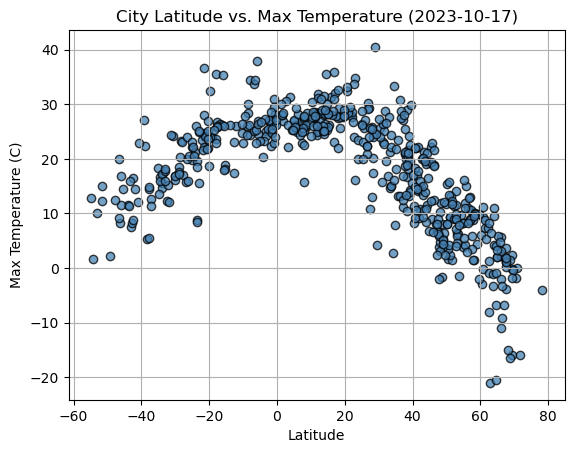

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"] , marker="o" , facecolor="steelblue" , edgecolor="black", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-10-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

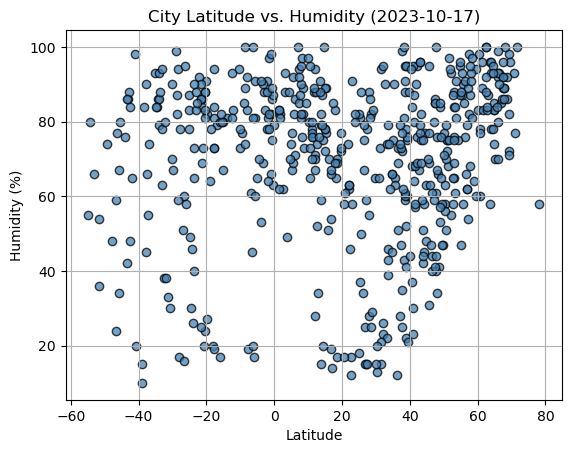

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"] , marker="o" , facecolor="steelblue" , edgecolor="black", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-10-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

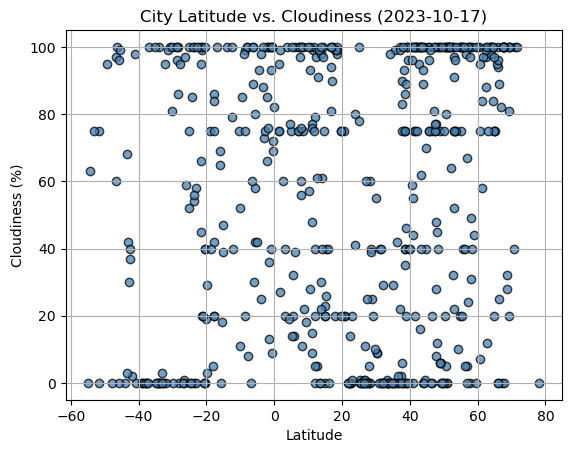

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"] , marker="o" , facecolor="steelblue" , edgecolor="black", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-10-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

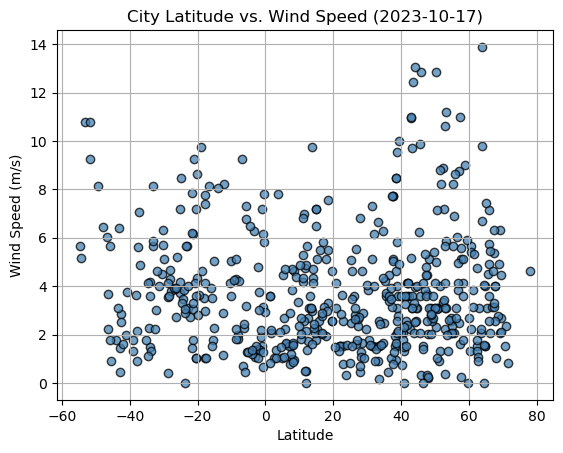

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"] , marker="o" , facecolor="steelblue" , edgecolor="black", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-10-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    line_data = x_values * slope + intercept
    plt.scatter(x_values, y_values, color="steelblue", edgecolor="black", alpha=0.75)
    plt.plot(x_values, line_data, color="red")
    line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize = 15, color = "red")
    print(f"The r-value is: {rvalue}")


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,verkhniye sergi,56.6469,59.5556,8.69,66,98,6.03,RU,1697574269
5,olonkinbyen,70.9221,-8.7187,0.08,77,100,2.35,SJ,1697574270
7,lazaro cardenas,17.9583,-102.2000,27.52,83,99,1.96,MX,1697574265
9,albany,42.6001,-73.9662,14.80,67,95,2.21,US,1697573783
11,anadyr,64.7500,177.4833,-6.72,85,20,4.00,RU,1697574272


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,imbituba,-28.2400,-48.6703,23.28,94,100,4.68,BR,1697574269
2,waitangi,-43.9535,-176.5597,11.57,76,0,1.79,NZ,1697574270
3,adamstown,-25.0660,-130.1015,22.15,87,100,4.16,PN,1697574270
4,puerto natales,-51.7236,-72.4875,12.25,54,75,9.26,CL,1697574270
6,richards bay,-28.7830,32.0377,18.47,87,96,3.57,ZA,1697574270


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8518294628851717


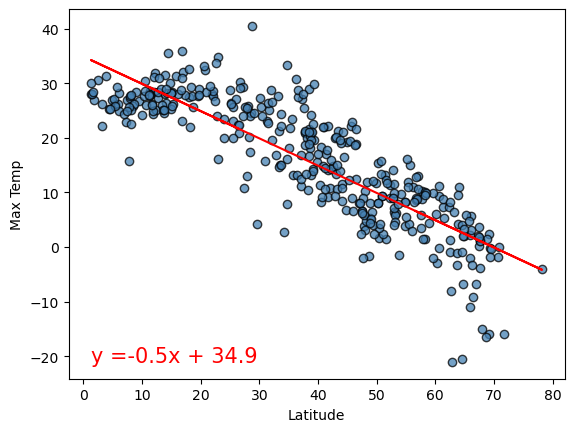

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linear_regression()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.7505738612195139


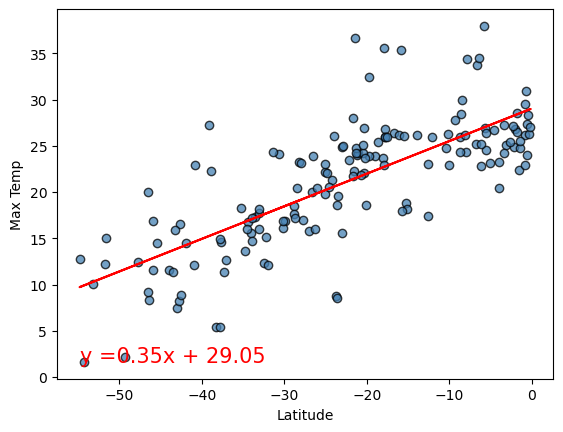

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linear_regression()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** The northern hemisphere plot shows the relationship between ascending latitude and max temperature for the cities represented. The r-value of -0.85 shows a high negative relationship between the rise in temperature and the rise in latitude which logically makes sense as we approach a polar region as we move more north. The southern hemisphere data shows a similar relationship, though in the inverse. With a r-value of 0.75, we see a high positive relationship between a rise in temperatures as we approach the equator, which makes sense as we again come from a polar region and move towards the warm equator region.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.17451019660726474


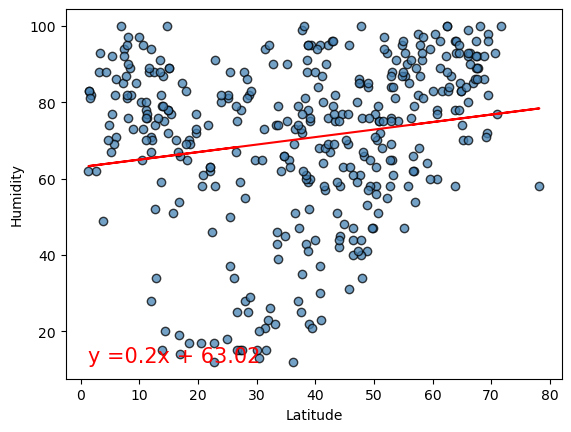

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.2052126784427271


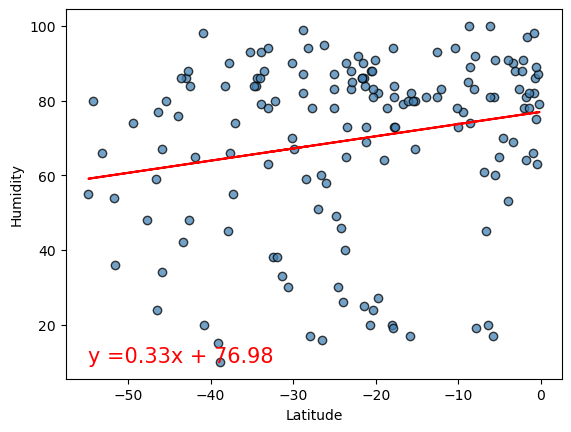

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** When comparing latitude to humidity, we see negligible correlations for both hemispheres. In the northern hemisphere we see an r-value of 0.17 while in the southern hemisphere we see a 0.20. While these are both positive values, both indicate there is no real correlation between geographic location and the humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.17565797539562739


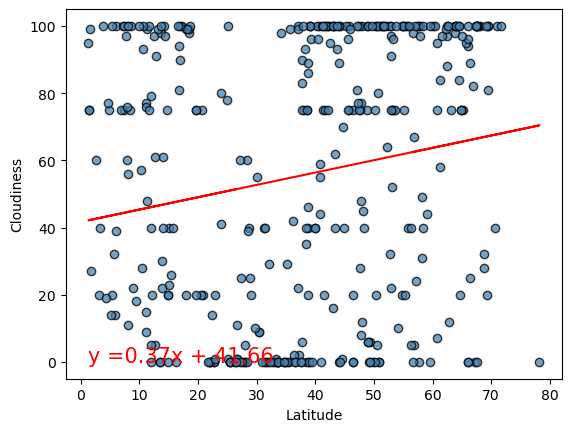

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.26908857730980307


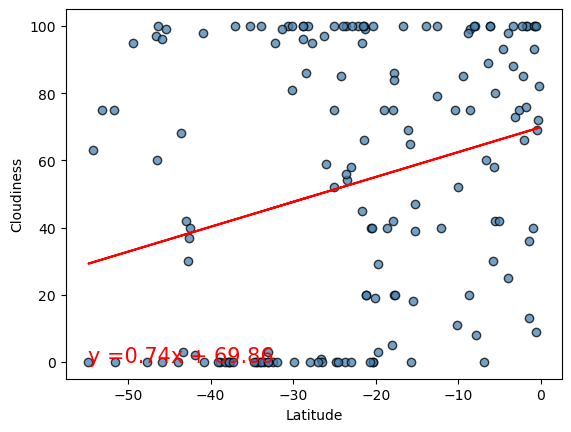

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linear_regression()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** When comparing cloudiness and latitude for both hemispheres, we once again see negligible correlations. In the northern hemisphere we have an r-value of 0.17 while in the southern hemisphere we gave 0.26. While the southern hemisphere's r-value is higher than the northern, both r-values show no real correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1672816983025093


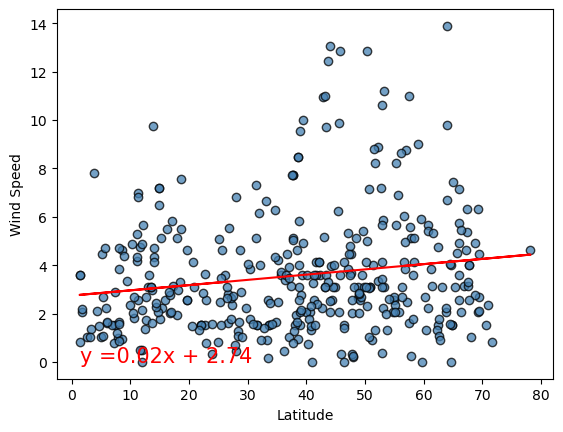

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: -0.15306585694672237


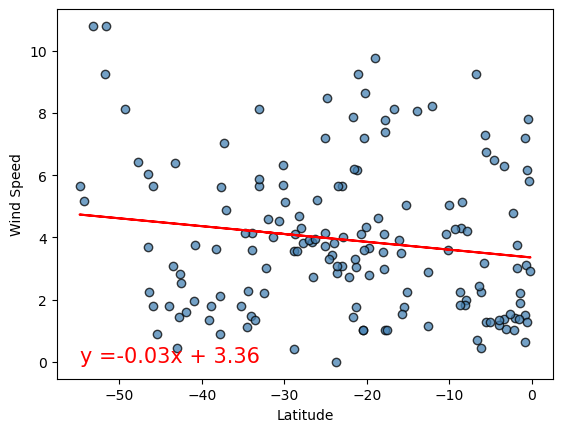

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linear_regression()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** When comparing latitude to wind speed, we once again see negligible correlations for both hemispheres, however this time we have one positive and one negative r-value. The northern hemisphere has a 0.16 r-value while the southern hemisphere has -0.15. Even though we have one negative relationship indication and one positive, the r-values are not large enough to indicate a real correlation.